In [1]:
import sys
print("Python ver: {}".format(sys.version))

Python ver: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [2]:
import pandas as pd
print("Pandas version: {}". format(pd.__version__))

import matplotlib as mp
print("Matplotlib version: {}". format(mp.__version__))

import numpy as np
print("Numpy version: {}".format(np.__version__))

import scipy as sp
print("Scipy version: {}".format(sp.__version__))

import sklearn
print("Scikit-learn version: {}".format(sklearn.__version__))


Pandas version: 2.2.2
Matplotlib version: 3.9.2
Numpy version: 1.26.4
Scipy version: 1.13.1
Scikit-learn version: 1.5.1


In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [5]:
print("target names: {}".format(iris_dataset['target_names']))

target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("feature names: \n{}".format(iris_dataset['feature_names']))

feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("shape of data: {}".format(iris_dataset['data'].shape))

shape of data: (150, 4)


In [8]:
print("type of data: {}".format(type(iris_dataset['data'])))

type of data: <class 'numpy.ndarray'>


In [9]:
print("first five col of data: \n{}".format(iris_dataset['data'][:5]))

first five col of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
print("type of target:{}".format(type(iris_dataset['target'])))

type of target:<class 'numpy.ndarray'>


In [11]:
print("shape of target: {}".format(iris_dataset['target'].shape))

shape of target: (150,)


In [12]:
print("target:\n{}".format(iris_dataset['target']))

target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13060\2520678067.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


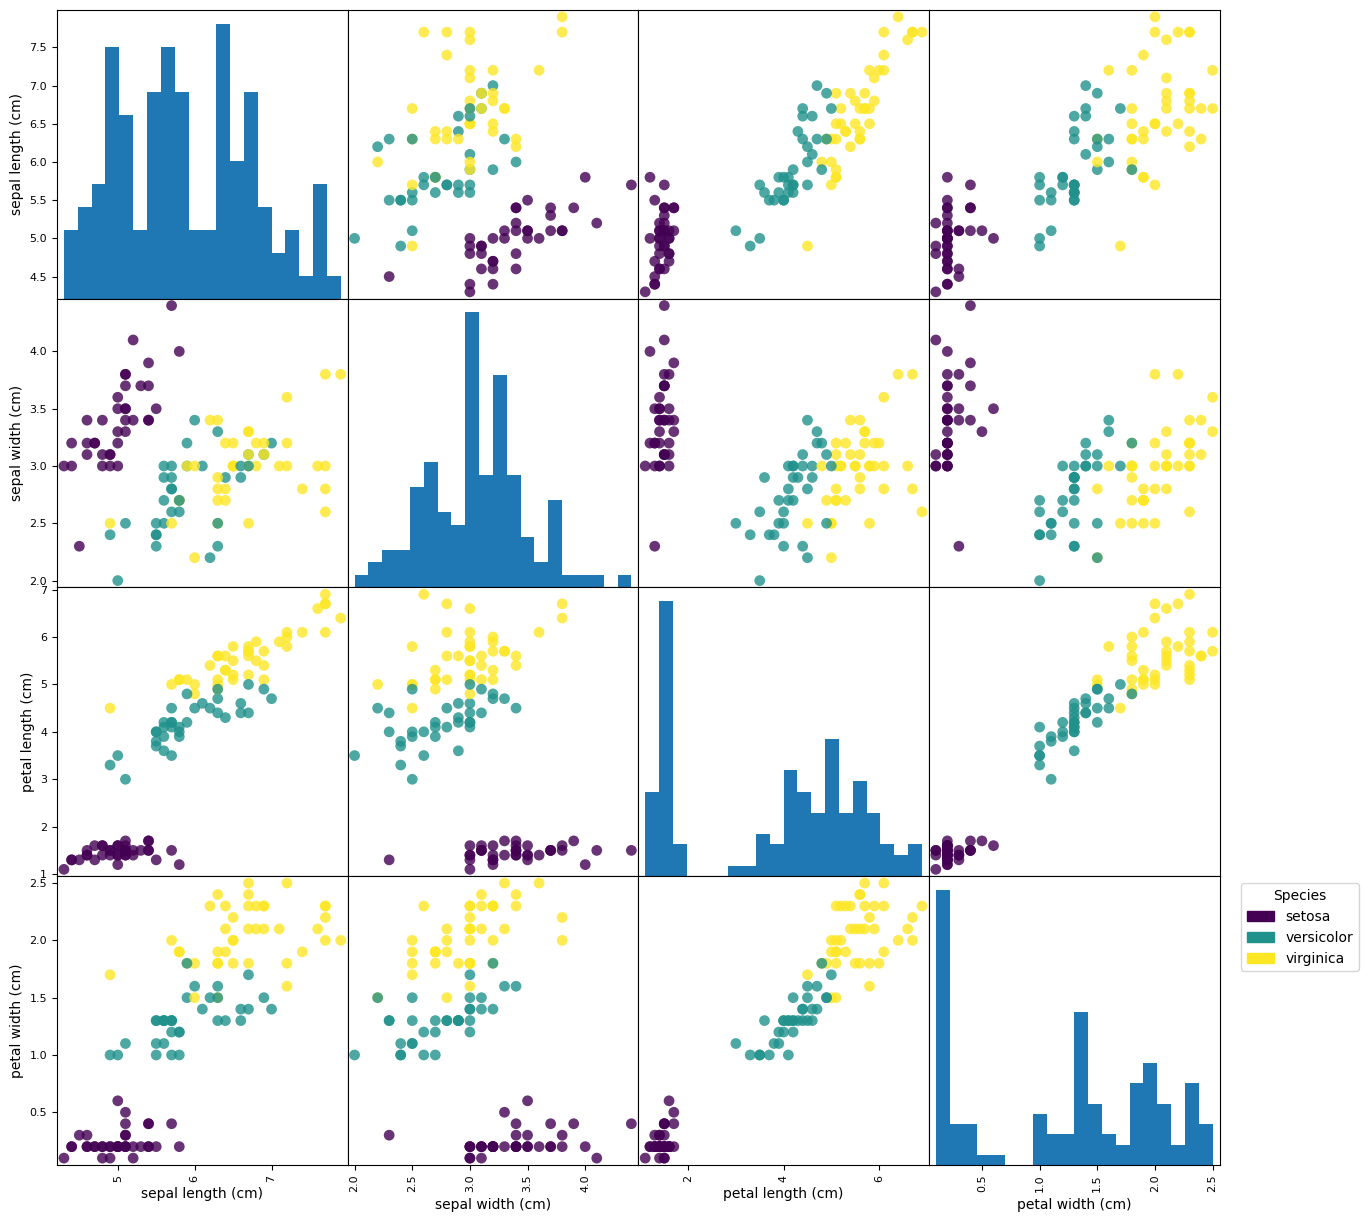

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='viridis')
target_names = iris_dataset['target_names']
cmap = plt.cm.get_cmap('viridis')
patches = [
    mpatches.Patch(color=cmap(i / (len(target_names) - 1)), label=target_name)
    for i, target_name in enumerate(target_names)
]
plt.legend(handles=patches, title="Species", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [23]:
prediction = knn.predict(X_new)
print("prediction: {}".format(prediction))
print("predicted target name: {}".format(iris_dataset['target_names'][prediction][0]))

prediction: [0]
predicted target name: setosa


In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictioms: \n {}".format(y_pred))

Test set predictioms: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

test set score: 0.97
